In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob

In [2]:
path = os.getcwd()
list_folders = [f.path for f in os.scandir(path) if f.is_dir()]

ISTELL_aligned_fixed_I_2cm_full = np.loadtxt(os.path.join(path,"../Data/without_ports/R2history_K11100_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics = np.loadtxt(os.path.join(path,"../Data/tol=1mm/R2history_K10400_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_1cm_tol = np.loadtxt(os.path.join(path,"../Data/tol=1cm/R2history_K10400_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_2cm_tol = np.loadtxt(os.path.join(path,"../Data/tol=2cm/R2history_K10400_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_backtracking = np.loadtxt(os.path.join(path,"../Data/tol=1mm_GPMO/R2history_K10400_nphi256_ntheta64.txt"),usecols=0)

ISTELL_results_list=[ISTELL_aligned_fixed_I_2cm_full,
                     ISTELL_aligned_diagnostics,
                     ISTELL_aligned_diagnostics_1cm_tol, 
                     ISTELL_aligned_diagnostics_2cm_tol,
                     ISTELL_aligned_diagnostics_backtracking
                     ]

ISTELL_aligned_fixed_I_2cm_full_vol_eff = np.loadtxt(os.path.join(path,"../Data/without_ports/eff_vol_history_K11100_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_vol_eff = np.loadtxt(os.path.join(path,"../Data/tol=1mm/eff_vol_history_K10400_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_1cm_tol_vol_eff = np.loadtxt(os.path.join(path,"../Data/tol=1cm/eff_vol_history_K10400_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_2cm_tol_vol_eff = np.loadtxt(os.path.join(path,"../Data/tol=2cm/eff_vol_history_K10400_nphi256_ntheta64.txt"),usecols=0)
ISTELL_aligned_diagnostics_backtracking_vol_eff = np.loadtxt(os.path.join(path,"../Data/tol=1mm_GPMO/eff_vol_history_K10400_nphi256_ntheta64.txt"),usecols=0)

ISTELL_vol_eff_list=[ISTELL_aligned_fixed_I_2cm_full_vol_eff, 
                     ISTELL_aligned_diagnostics_vol_eff,
                     ISTELL_aligned_diagnostics_1cm_tol_vol_eff, 
                     ISTELL_aligned_diagnostics_2cm_tol_vol_eff,
                     ISTELL_aligned_diagnostics_backtracking_vol_eff
                     ]

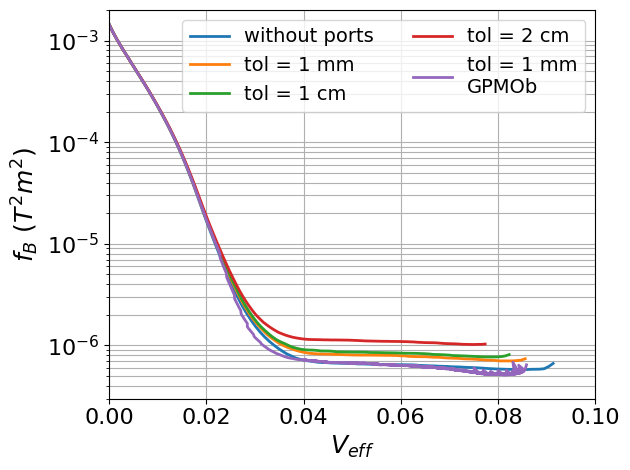

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$V_{eff}$',fontsize=18)
ax.set_ylabel(r'$f_B$ $(T^2m^2)$', fontsize=18)

for i in range(len(ISTELL_results_list)):
    ax.semilogy(ISTELL_vol_eff_list[i], ISTELL_results_list[i],linewidth=2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.grid(which='both')
ax.set_xlim(0,0.1)
ax.legend(['without ports','tol = 1 mm','tol = 1 cm','tol = 2 cm', 'tol = 1 mm\nGPMOb'],fontsize=14, ncol=2)
ax.set_ylim(3e-7,2e-3)

plt.tight_layout()

plt.savefig("../Plots/ISTELL_diag.pdf")

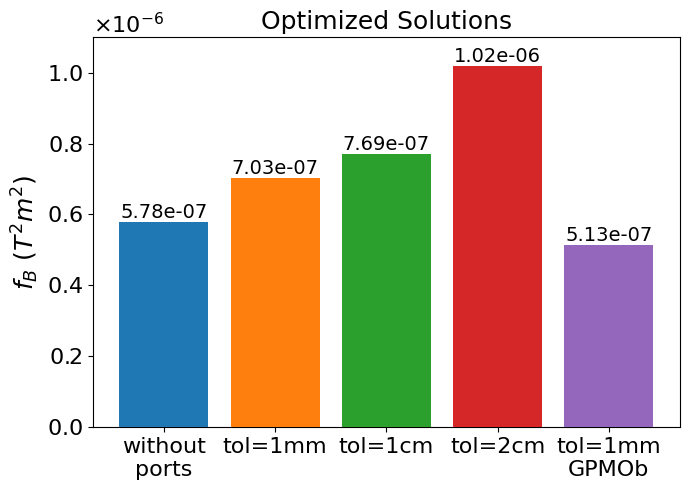

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax.ticklabel_format(style="sci",axis='y',scilimits=(0,0), useLocale=None, useMathText=True)
ax.tick_params(axis='both', which='both', labelsize=16)
legend = ['without\nports','tol=1mm','tol=1cm','tol=2cm', 'tol=1mm\nGPMOb']
counts = []

for i in range(len(ISTELL_results_list)):
    counts.append(min(ISTELL_results_list[i]))

bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

bar = ax.bar(legend, counts,width=0.8, color=bar_colors,zorder=3)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2e}', ha='center', va='bottom',fontsize=14)
    
ax.set_ylabel(r'$f_B$ $(T^2m^2)$',fontsize=18)
ax.set_title('Optimized Solutions',fontsize=18)

ax.set_ylim(0,1.1e-6)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xticks(legend, legend,  ha='center', fontsize=16)
plt.tight_layout()
plt.savefig("../Plots/ISTELL_diag_barplot.pdf")